# Pymaceuticals Inc.
---

### Analysis

- A total of 249 mice were studied but our analysis will be based on 248 mice as we removed duplicate data points. Similar rates of male(51%) and female(49%) of mice were studied.
- The 4 most promising drug treatments include: Capomulin, Ramicane, Infubinol, and Ceftamin. Of these 4 drug treatments, Capomulin and Ramicane seem the most promising as mice treated with those drugs seem to have the smallest tumors by the end of the treatment.
- A closer look at Mouse J246, which was treated with Capomulin, indicates an overall decline in the volume of the tumor as the mouse went through more treatment days, with a few spikes in between.
- There seems to be a strong correlation (0.84) between the weight of mice treated with Capomulin and their average tumor volumes but we do not have enough information to ascertain any causal relationship.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
initialMouseStudyDF = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
initialMouseStudyDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
miceAmount = len(initialMouseStudyDF["Mouse ID"].unique())
miceAmount

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = initialMouseStudyDF.loc[initialMouseStudyDF.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateDF = initialMouseStudyDF[initialMouseStudyDF["Mouse ID"] == "g989"]
duplicateDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouseStudyDF = initialMouseStudyDF[initialMouseStudyDF["Mouse ID"].isin(duplicate)==False]
# mouseStudyDF # shows less observations so duplicate has been removed

In [6]:
# Checking the number of mice in the clean DataFrame.
updatedmiceAmount = len(mouseStudyDF["Mouse ID"].unique())
updatedmiceAmount # should be 248

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_volume = mouseStudyDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_volume = mouseStudyDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_volume = mouseStudyDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd_volume = mouseStudyDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_volume = mouseStudyDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_statistics1 = pd.DataFrame({
    "Mean Tumor Volume": mean_volume,
    "Median Tumor Volume": median_volume,
    "Tumor Volume Variance": var_volume,
    "Tumor Volume Std. Dev.": sd_volume,
    "Tumor Volume Std. Err.": sem_volume,
})

summary_statistics1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics2 = mouseStudyDF.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg([
    "mean", "median", "var", "std", "sem"])
summary_statistics2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

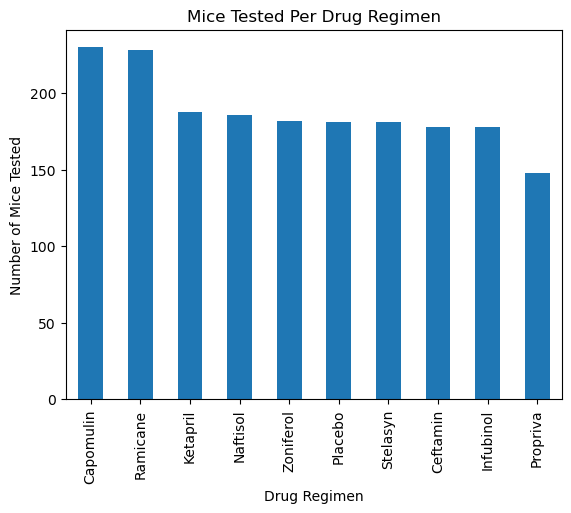

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timeDF = pd.DataFrame(mouseStudyDF.groupby("Drug Regimen")["Timepoint"].count()) # create new dataframe
bar1 = timeDF.sort_values("Timepoint", ascending=False).plot(kind='bar', title='Mice Tested Per Drug Regimen', ylabel='Number of Mice Tested', legend=None)

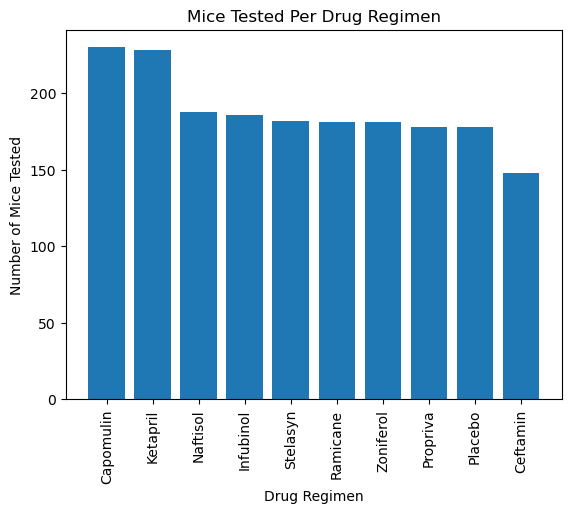

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xAxis = mouseStudyDF["Drug Regimen"].unique()
yAxis = sorted(mouseStudyDF.groupby("Drug Regimen")["Timepoint"].count(), reverse=True)
bar2 = plt.bar(xAxis, yAxis)
plt.xticks(rotation="vertical")
plt.title("Mice Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

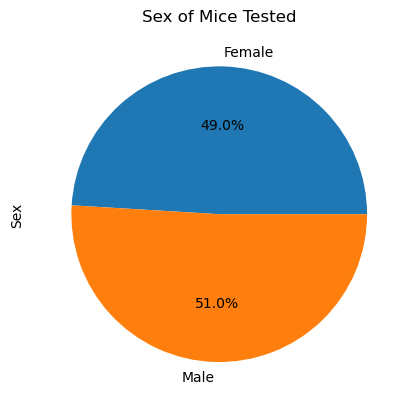

In [11]:
sexDF = pd.DataFrame(mouseStudyDF.groupby("Sex")["Mouse ID"].count())
sexDF["Sex"] = (sexDF["Mouse ID"]/sexDF["Mouse ID"].sum())*100
percentsexDF = sexDF["Sex"]
pie1 = percentsexDF.plot(kind="pie", y="Sex", title='Sex of Mice Tested', autopct="%1.1f%%")

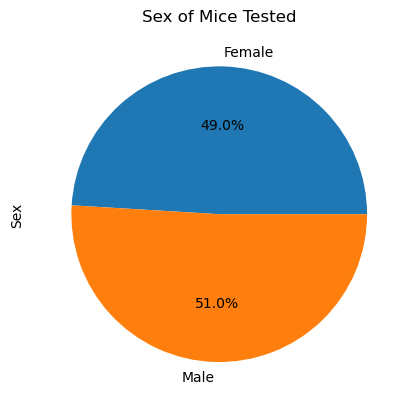

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouseStudyDF["Sex"].unique()
yAxis = sexDF["Sex"].to_list()
pie2 = plt.pie(yAxis, autopct="%1.1f%%", labels=labels)
plt.ylabel("Sex")
plt.title("Sex of Mice Tested")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatestTime = pd.DataFrame(mouseStudyDF.groupby("Mouse ID")["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorVolumeDF = pd.merge(greatestTime, mouseStudyDF, how="left", on=["Mouse ID", "Timepoint"]).reset_index(drop=True)
tumorVolumeDF.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
import numpy as np
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    volumes = tumorVolumeDF.loc[(tumorVolumeDF["Drug Regimen"] == drug),"Tumor Volume (mm3)"]
    tumor_volume.append(volumes)
    # add subset
    Q1 = np.percentile(volumes,25)
    Q3 = np.percentile(volumes,75)
    IQR = Q3 - Q1
    # Determine outliers using upper and lower bounds
    lowerBound = Q1 - (1.5*IQR)
    upperBound = Q3 + (1.5*IQR)
    Outliers = volumes.loc[(volumes > upperBound)|(volumes < lowerBound)]
    print(f"{drug}'s potential outliers: {Outliers}")
        

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


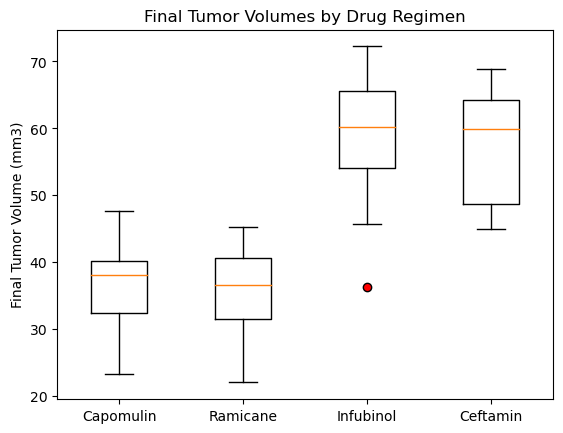

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
bplot = plt.boxplot(tumor_volume, flierprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'black'})
ticks = [x for x in treatments]
plt.xticks([1,2,3,4], ticks)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volumes by Drug Regimen")
plt.show()


## Line and Scatter Plots

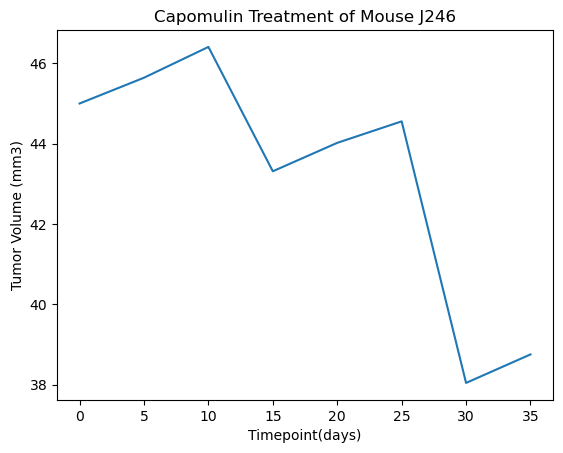

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
CapomulinDF = mouseStudyDF.loc[(mouseStudyDF["Drug Regimen"] == "Capomulin")] # DF with only mice treated with Capomulin
# will pick Mouse ID j246
mouse = mouseStudyDF.loc[(mouseStudyDF["Mouse ID"] == "j246"), ["Tumor Volume (mm3)", "Timepoint"]]
lineplt = plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse J246")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

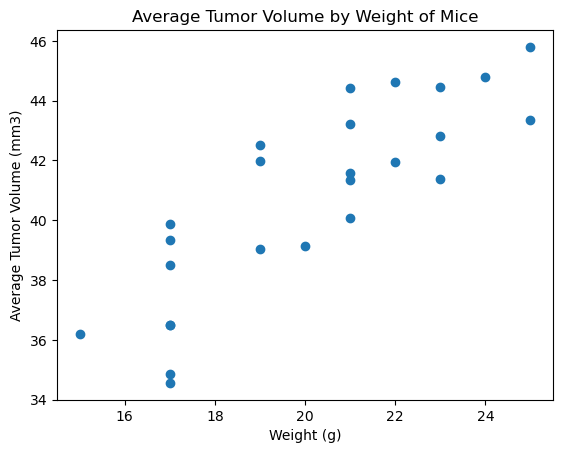

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgTumorVolDF = pd.DataFrame(CapomulinDF.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
weightDF = pd.DataFrame(CapomulinDF.groupby("Mouse ID")["Weight (g)"].mean())
volWeightDF = pd.merge(avgTumorVolDF, weightDF, on="Mouse ID")
weight = volWeightDF["Weight (g)"]
avgVol = volWeightDF["Tumor Volume (mm3)"]
scatterplt = plt.scatter(weight, avgVol)
plt.title("Average Tumor Volume by Weight of Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


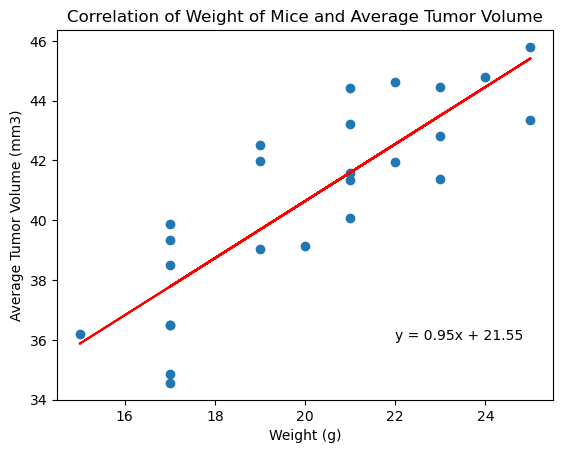

In [18]:
# Calculate the correlation coefficient and linear regression model 
corr = st.pearsonr(weight, avgVol)
print(f"The correlation between mouse weight and the average tumor volume is {corr[0]:.2f}")

from scipy.stats import linregress

# for mouse weight and average tumor volume for the Capomulin regimen


(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avgVol)
regressValues = weight*slope + intercept
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

# same plotting as above
scatterplt2 = plt.scatter(weight, avgVol)
plt.plot(weight, regressValues, "r-")
plt.annotate(lineEQ, (22,36))
plt.title("Correlation of Weight of Mice and Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()